In [1]:
import os
import cv2
import csv
import glob
import json
import pprint

import math

import numpy as np
import pandas as pd

import scipy
import matplotlib.pyplot as plt

# EXPERT SCORES

In [17]:
only_experts = pd.read_csv('/home/kunaldargan/ROBO_SURGERY/expert_scores.csv')

In [18]:
only_experts

,Video,Hand-eye Coordination,Instrument-Tissue Manipulation,Dexterity,Flow of procedure,Effectualness,Overall
0,E1_t1,3,3,3,3,4,15
1,E1_t2,3,3,3,2,1,8
2,E1_t3,4,3,4,4,4,18
3,E1_t4,3,2,4,4,4,16
4,E1_t5,3,3,4,4,4,17
5,E1_t6,3,3,4,4,4,17
6,E1_t7,4,4,4,4,4,20
7,E1_t8,3,3,4,4,4,17
8,E1_t9,4,4,4,4,4,20
9,E1_t10,4,3,4,4,4,19


In [19]:
only_experts.columns

Index(['Video', 'Hand-eye Coordination', 'Instrument-Tissue Manipulation',
       'Dexterity', 'Flow of procedure', 'Effectualness', 'Overall'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd400e98780>,
      dtype=object)

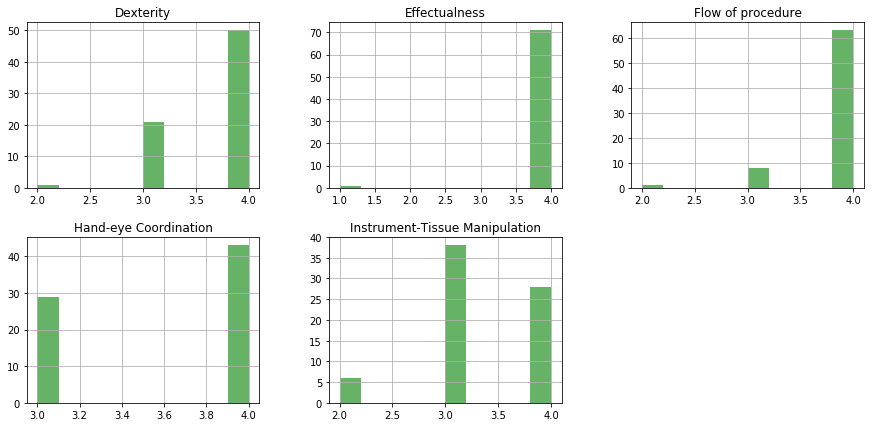

In [20]:
# Evaluation Metrics histogram
only_experts.hist(color='g', column=['Hand-eye Coordination', 'Instrument-Tissue Manipulation',
       'Dexterity', 'Flow of procedure', 'Effectualness'], alpha=0.6, bins=10, layout=(2,3), figsize=(15,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd400bf3710>]],
      dtype=object)

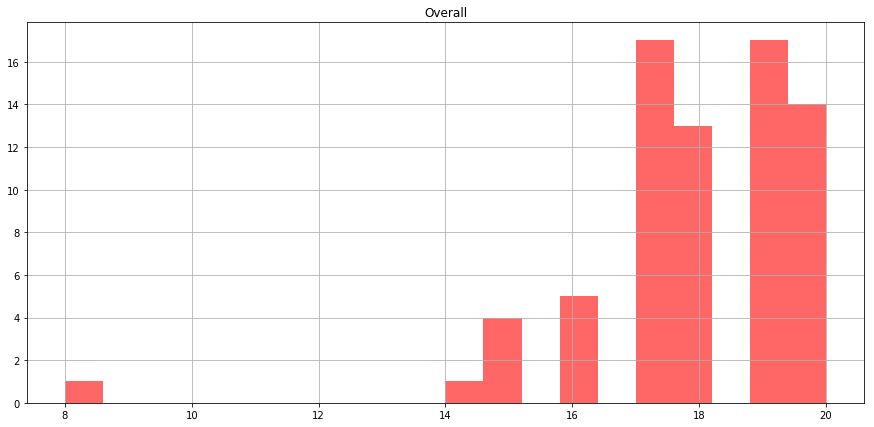

In [21]:
only_experts.hist(color='r', column=['Overall'], alpha=0.6, bins=20, figsize=(15,7))

# TRAINEE SCORES

In [22]:
only_trainees = pd.read_csv('/home/kunaldargan/ROBO_SURGERY/trainee_scores.csv')

In [23]:
only_trainees

,Video,Hand-eye Coordination,Instrument-Tissue Manipulation,Dexterity,Flow of procedure,Effectualness,Overall
0,T1_1_t1,2,2,3,3,4,11
1,T1_1_t2,2,2,3,3,4,10
2,T1_1_t3,2,2,2,3,4,10
3,T1_1_t4,2,2,2,3,4,11
4,T1_1_t5,1,3,3,3,4,10
5,T1_1_t6,1,2,2,2,4,8
6,T1_1_t7,1,1,1,2,4,7
7,T1_1_t8,1,1,1,1,4,5
8,T1_1_t9,1,1,2,3,4,8
9,T1_1_t10,2,3,2,3,4,11


In [24]:
only_trainees.columns

Index(['Video', 'Hand-eye Coordination', 'Instrument-Tissue Manipulation',
       'Dexterity', 'Flow of procedure', 'Effectualness', 'Overall'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd400ba7588>,
      dtype=object)

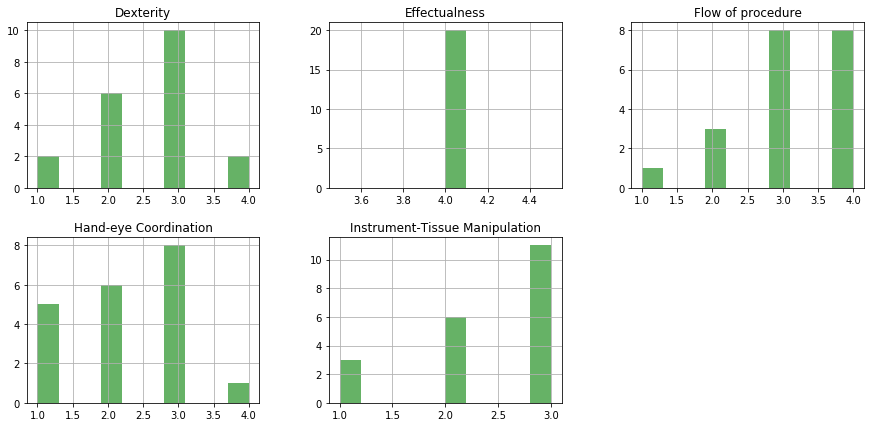

In [25]:
# Evaluation Metrics histogram
only_trainees.hist(color='g', column=['Hand-eye Coordination', 'Instrument-Tissue Manipulation',
       'Dexterity', 'Flow of procedure', 'Effectualness'], alpha=0.6, bins=10, layout=(2,3), figsize=(15,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4009e6518>]],
      dtype=object)

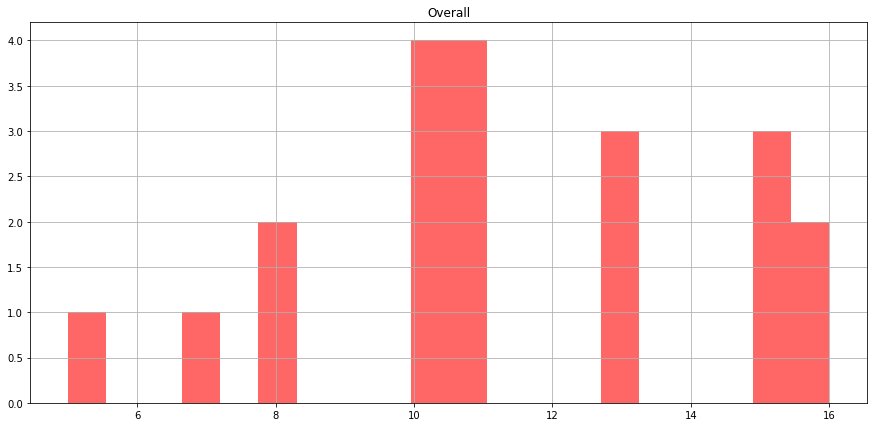

In [26]:
only_trainees.hist(color='r', column=['Overall'], alpha=0.6, bins=20, figsize=(15,7))

# COMBINED SCORES

In [27]:
scores = pd.read_csv('/home/kunaldargan/ROBO_SURGERY/expert_scores_trainee_scores.csv')

In [28]:
scores

,Video,Hand-eye Coordination,Instrument-Tissue Manipulation,Dexterity,Flow of procedure,Effectualness,Overall
0,E1_t1,3,3,3,3,4,15
1,E1_t2,3,3,3,2,1,8
2,E1_t3,4,3,4,4,4,18
3,E1_t4,3,2,4,4,4,16
4,E1_t5,3,3,4,4,4,17
5,E1_t6,3,3,4,4,4,17
6,E1_t7,4,4,4,4,4,20
7,E1_t8,3,3,4,4,4,17
8,E1_t9,4,4,4,4,4,20
9,E1_t10,4,3,4,4,4,19


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd400897f98>,
      dtype=object)

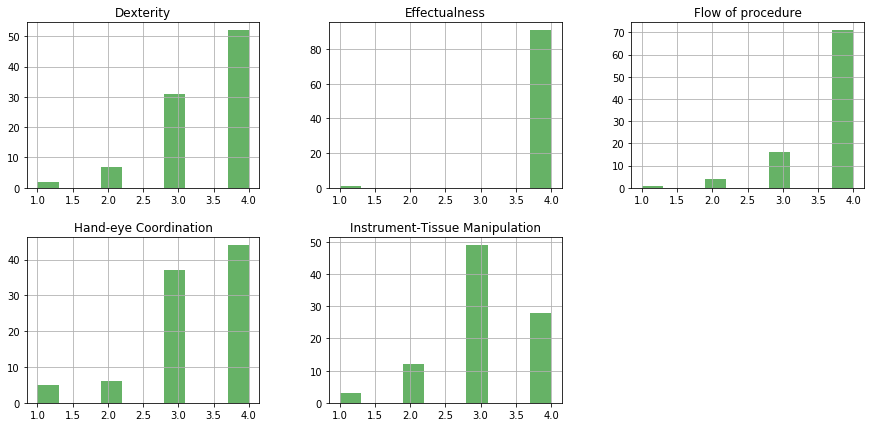

In [29]:
# Evaluation Metrics histogram
scores.hist(color='g', column=['Hand-eye Coordination', 'Instrument-Tissue Manipulation',
       'Dexterity', 'Flow of procedure', 'Effectualness'], alpha=0.6, bins=10, layout=(2,3), figsize=(15,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd400791978>]],
      dtype=object)

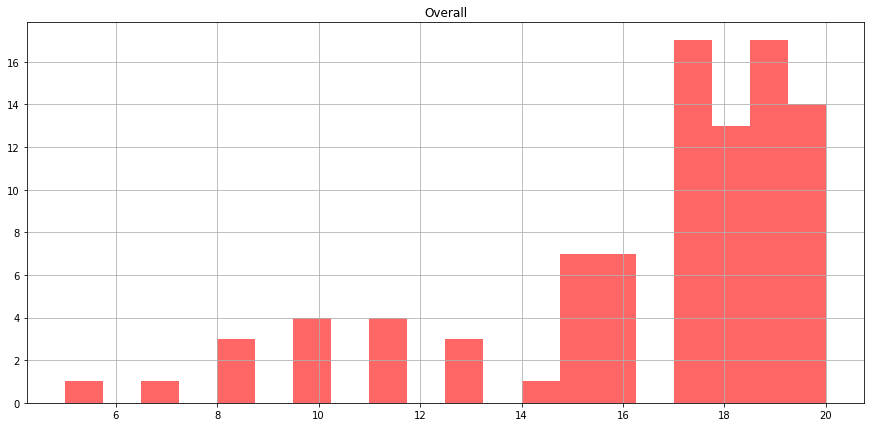

In [30]:
scores.hist(color='r', column=['Overall'], alpha=0.6, bins=20, figsize=(15,7))